########################################第1次测试
[[2.25689903]
 [1.91540479]
 [1.6724617 ]
 [1.65759221]
 [2.29541546]
 [2.2529662 ]
 [2.233567  ]
 [1.7942795 ]
 [1.90631309]
 [1.59251126]]
########################################最小值
[2.25689903 1.91540479 1.6724617  1.65759221 2.29541546 2.2529662
 2.233567   1.7942795  1.90631309 1.59251126]
########################################第2次测试
[[0.32754273 4.20172309]
 [0.45410769 3.8348288 ]
 [0.30422595 3.6161136 ]
 [0.29081031 3.60350218]
 [0.38598195 4.23833185]
 [4.18875711 0.42497288]
 [4.1691721  0.41257945]
 [3.74022813 0.15539011]
 [3.85181965 0.07822596]
 [3.53695433 0.36974717]]
########################################最小值
[0.32754273 0.45410769 0.30422595 0.29081031 0.38598195 0.42497288
 0.41257945 0.15539011 0.07822596 0.36974717]
########################################第3次测试
[[0.03759658 4.20172309 0.56450362]
 [0.718618   3.8348288  0.37445254]
 [0.60378679 3.6161136  0.22807088]
 [0.6240233  3.60350218 0.14881965]
 [0.03759658 

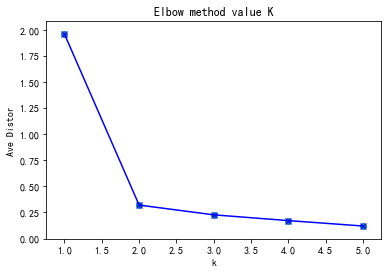

In [2]:

#K值的确定
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']= ['SimHei'] #中文注释
plt.rcParams['axes.unicode_minus'] = False #显示正负号

cluster1 = np.random.uniform(0.5,1.5,(2,5))
cluster2 = np.random.uniform(3.5,4.5,(2,5))
X = np.hstack((cluster1,cluster2)).T
# print(X)
K = range(1, 6)
meandistortions = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    # print(kmeans)
    kmeans.fit(X)
    # print(X.shape[0])
    #找中"心位置，找出每个点到中心点的最小距离，求和，在求平均       ###euclidean,欧式距离，固定的写法
    meandistortions.append(sum(np.min(cdist(X,kmeans.cluster_centers_,'euclidean'), axis=1)) / X.shape[0])
    print("#"*40+"第"+str(k)+"次测试")
    print(cdist(X,kmeans.cluster_centers_,'euclidean'))
    print("#"*40+"最小值")
    print(np.min(cdist(X,kmeans.cluster_centers_,'euclidean'), axis=1))
print(meandistortions)
plt.plot(K, meandistortions,'bx-')
plt.xlabel('k')
# plt.ylabel('平均畸变程度',fontproperties=font)
plt.ylabel('Ave Distor')
# plt.title('用肘部法则来确定最佳的K值',fontproperties=font);
plt.title('Elbow method value K')
plt.scatter(K,meandistortions)
plt.show()

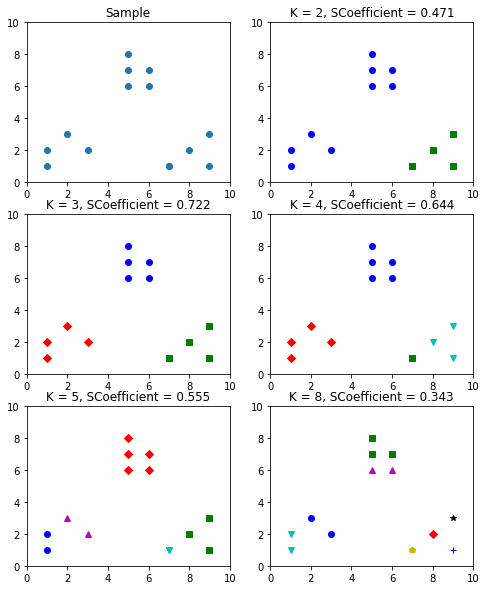

In [8]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
#分割出6个子图，并在1号作图
plt.figure(figsize=(8, 10))
plt.subplot(3, 2, 1)
#初始化原始数字点
x1 = np.array([1, 2, 3, 1, 5, 6, 5, 5, 6, 7, 8, 9, 7, 9])
x2 = np.array([1, 3, 2, 2, 8, 6, 7, 6, 7, 1, 2, 1, 1, 3])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)  #组合（2，10）
# print(X)
#在1号子图做出原始数据点阵的分布
plt.xlim([0, 10])  #确定
plt.ylim([0, 10])
plt.title('Sample')
plt.scatter(x1, x2)
#点的颜色
colors = ['b','g','r','c','m','y','k','b']
#点的标号
markers = ['o','s','D','v','^','p','*','+']
#簇的个数
tests = [2, 3, 4, 5, 8]
subplot_counter = 1#训练模型
for t in tests:
    subplot_counter+= 1
    plt.subplot(3, 2, subplot_counter) #从第3个画板开始
    kmeans_model = KMeans(n_clusters=t).fit(X)
    for i, l in enumerate(kmeans_model.labels_):
        plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l],ls='None')  #每个画板画点
        plt.xlim([0, 10])
        plt.ylim([0, 10])
        plt.title('K = %s, SCoefficient = %.03f' % (t, metrics.silhouette_score(X,#SCoefficient保留3位小数
                    kmeans_model.labels_,metric='euclidean')))
plt.show()

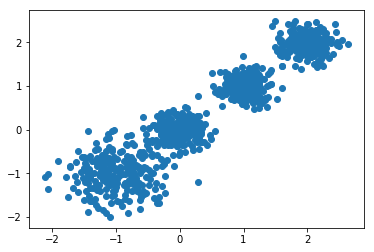

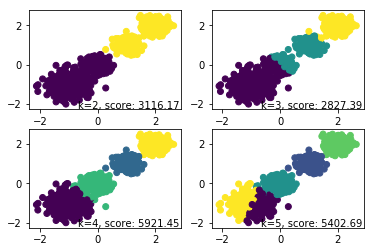

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
# X为样本特征，Y为样本簇类别， 共1000个样本，每个样本4个特征，共4个簇，
#簇中心在[-1,-1], [0,0],[1,1], [2,2]， 簇方差分别为[0.4, 0.2, 0.2]
X, y = make_blobs(n_samples=1000, n_features=2, centers=[[-1,-1], [0,0], [1,1], [2,2]],
cluster_std=[0.4, 0.2, 0.2, 0.2],
random_state =9)
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.show()

for index, k in enumerate((2,3,4,5)):
    plt.subplot(2,2,index+1)
    y_pred = MiniBatchKMeans(n_clusters=k, batch_size = 200,random_state=9).fit_predict(X)
    score= metrics.calinski_harabaz_score(X, y_pred)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.text(.99, .01, ('k=%d, score: %.2f' % (k,score)),
    transform=plt.gca().transAxes, size=10,
    horizontalalignment='right')
plt.show()

In [18]:
# print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
n_colors = 64
# 加载本地数据库里面的图片
china = load_sample_image("china.jpg")
# 转换为浮点数而不是默认的8位整数编码。
# 每一行有255个颜色分类
# 在[0-1]范围内
china = np.array(china, dtype=np.float64) / 255

D:\Anaconda3-5\ananananana\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
D:\Anaconda3-5\ananananana\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


In [14]:
# 45/5000加载图像并转换为2D numpy数组。
w, h, d = original_shape = tuple(china.shape)
assert d== 3
image_array = np.reshape(china, (w * h, d))
print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print("done in %0.3fs." % (time() - t0))
# 获取所有的标签
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))

Fitting model on a small sub-sample of the data
done in 0.503s.
Predicting color indices on the full image (k-means)
done in 0.196s.


In [16]:
def recreate_image(codebook, labels, w, h):
#重新创建代码簿和标签中的（压缩）图像
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

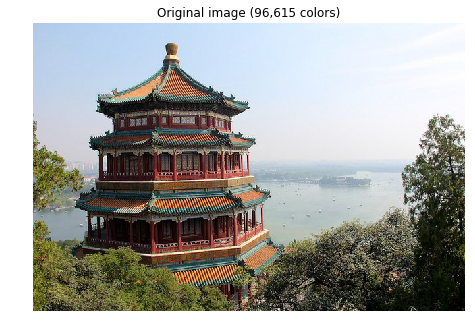

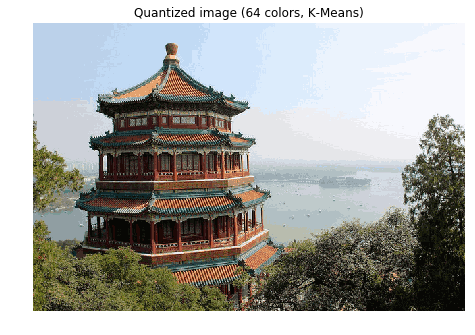

In [17]:
# 显示所有结果以及原始图像
plt.figure(1)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china)
plt.figure(2)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image (64 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))
plt.show()